In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from datetime import datetime

In [22]:
# read csv data
filepath = 'data.csv'
data = pd.read_csv(filepath)
data.describe()

,FID,Latitude,Longitude,Measurement,Accession Number,Ocean Bottom Depth (m),Sediment Sample Depth (m),Transect Number,Sampling Point on Beach,Volunteers Number,Collecting Time (min),x,y
count,21865.000000,21865.00000,21793.000000,16048.000000,21865.000000,235.000000,256.000000,273.000000,560.000000,5817.000000,5817.000000,2.178600e+04,2.178600e+04
mean,95549.000000,26.44605,-68.209634,391.445388,240089.696593,1077.804255,0.034766,2.571429,6.258929,2.267320,15.062059,-7.597321e+06,3.229450e+06
std,6312.026154,18.24403,67.033640,8396.474420,28242.294778,1028.733792,0.020778,1.404898,4.023068,4.675055,23.434508,7.459563e+06,2.674664e+06
min,84617.000000,-71.69904,-179.994200,0.000000,170967.000000,3.900000,0.005000,1.000000,1.000000,1.000000,0.000000,-2.003686e+07,-1.164563e+07
25%,90083.000000,20.29000,-97.193800,0.000000,211007.000000,8.800000,0.010000,1.000000,3.000000,1.000000,10.000000,-1.081957e+07,2.305044e+06
50%,95549.000000,28.49990,-79.570000,0.010297,259486.000000,1078.000000,0.050000,2.000000,6.000000,1.000000,10.000000,-8.858805e+06,3.300764e+06
75%,101015.000000,34.05380,-60.300000,0.170136,259486.000000,2200.000000,0.050000,3.000000,9.000000,2.000000,10.000000,-6.715905e+06,4.010381e+06
max,106481.000000,89.76140,179.854333,800000.000000,281206.000000,2998.000000,0.050000,6.000000,24.000000,100.000000,809.000000,2.002129e+07,2.999878e+07


In [3]:
# clean data if there is NaN in columns longitude, latitude, and measurement
data.dropna(subset=['Latitude'], inplace=True)
data.dropna(subset=['Longitude'], inplace=True)
data.dropna(subset=['Measurement'], inplace=True)

# extract data for longitude, latitude, and measurement
lat = data['Latitude']
lon = data['Longitude']
meas = data['Measurement']
display(lat, lon, meas)

# check whether there is any NaN values
print(np.isnan(lat).any())
print(np.isnan(lon).any())
print(np.isnan(meas).any())

0        25.480000
1        26.250000
2        26.130000
3        26.210000
4        26.100000
           ...    
21460    30.000000
21461    29.500000
21462    29.500000
21463    29.501667
21464    29.998333
Name: Latitude, Length: 15976, dtype: float64

0        -79.480000
1        -79.110000
2        -78.810000
3        -78.420000
4        -78.290000
            ...    
21460    135.000000
21461    134.996667
21462    134.500000
21463    133.998333
21464    133.995000
Name: Longitude, Length: 15976, dtype: float64

0        0.002160
1        0.000000
2        0.006480
3        0.000000
4        0.000000
           ...   
21460    0.125674
21461    0.062966
21462    0.134917
21463    0.178255
21464    0.069749
Name: Measurement, Length: 15976, dtype: float64

False
False
False


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
display(data)
df = pd.DataFrame(data)
display(df)

/tmp/ipykernel_65/3657660601.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


,FID,Date,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,...,Sediment Sample Depth (m),Transect Number,Sampling Point on Beach,Volunteers Number,Collecting Time (min),State,Country,Marine Setting,x,y
0,84617,1999-03-30,25.480000,-79.480000,Atlantic Ocean,NaN,NaN,0.002160,pieces/m3,0.0005-0.005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-8.847673e+06,2.934818e+06
1,84618,1999-03-31,26.250000,-79.110000,Atlantic Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-8.806485e+06,3.030078e+06
2,84619,1999-03-31,26.130000,-78.810000,Atlantic Ocean,NaN,NaN,0.006480,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-8.773089e+06,3.015191e+06
3,84620,1999-03-31,26.210000,-78.420000,Atlantic Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-8.729674e+06,3.025114e+06
4,84621,1999-04-01,26.100000,-78.290000,Atlantic Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-8.715203e+06,3.011472e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21460,106077,2014-02-21,30.000000,135.000000,Pacific Ocean,Philippine Sea,NaN,0.125674,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,1.502813e+07,3.503550e+06
21461,106078,2014-02-21,29.500000,134.996667,Pacific Ocean,Philippine Sea,NaN,0.062966,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,1.502776e+07,3.439440e+06
21462,106079,2014-02-21,29.500000,134.500000,Pacific Ocean,Philippine Sea,NaN,0.134917,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,1.497247e+07,3.439440e+06
21463,106080,2014-02-21,29.501667,133.998333,Pacific Ocean,Philippine Sea,NaN,0.178255,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,1.491663e+07,3.439653e+06


,FID,Date,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,...,Sediment Sample Depth (m),Transect Number,Sampling Point on Beach,Volunteers Number,Collecting Time (min),State,Country,Marine Setting,x,y
0,84617,1999-03-30,25.480000,-79.480000,Atlantic Ocean,NaN,NaN,0.002160,pieces/m3,0.0005-0.005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-8.847673e+06,2.934818e+06
1,84618,1999-03-31,26.250000,-79.110000,Atlantic Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-8.806485e+06,3.030078e+06
2,84619,1999-03-31,26.130000,-78.810000,Atlantic Ocean,NaN,NaN,0.006480,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-8.773089e+06,3.015191e+06
3,84620,1999-03-31,26.210000,-78.420000,Atlantic Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-8.729674e+06,3.025114e+06
4,84621,1999-04-01,26.100000,-78.290000,Atlantic Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-8.715203e+06,3.011472e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21460,106077,2014-02-21,30.000000,135.000000,Pacific Ocean,Philippine Sea,NaN,0.125674,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,1.502813e+07,3.503550e+06
21461,106078,2014-02-21,29.500000,134.996667,Pacific Ocean,Philippine Sea,NaN,0.062966,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,1.502776e+07,3.439440e+06
21462,106079,2014-02-21,29.500000,134.500000,Pacific Ocean,Philippine Sea,NaN,0.134917,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,1.497247e+07,3.439440e+06
21463,106080,2014-02-21,29.501667,133.998333,Pacific Ocean,Philippine Sea,NaN,0.178255,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,1.491663e+07,3.439653e+06


In [5]:
df.describe()

,FID,Date,Latitude,Longitude,Measurement,Accession Number,Ocean Bottom Depth (m),Sediment Sample Depth (m),Transect Number,Sampling Point on Beach,Volunteers Number,Collecting Time (min),x,y
count,15976.000000,15976,15976.000000,15976.000000,15976.000000,15976.000000,199.000000,256.000000,273.000000,560.000000,0.0,0.0,1.596900e+04,1.596900e+04
mean,92736.732849,2007-10-10 09:14:09.073610240,25.001144,-59.084686,392.717590,232850.510391,1271.879397,0.034766,2.571429,6.258929,NaN,NaN,-6.582642e+06,3.109640e+06
min,84617.000000,1972-04-20 00:00:00,-71.699040,-179.994200,0.000000,170967.000000,3.900000,0.005000,1.000000,1.000000,NaN,NaN,-2.003686e+07,-1.164563e+07
25%,88610.750000,2000-03-11 00:00:00,17.217500,-110.349147,0.000000,211007.000000,17.400000,0.010000,1.000000,3.000000,NaN,NaN,-1.228401e+07,1.945284e+06
50%,92604.500000,2009-07-09 00:00:00,25.955000,-69.050000,0.010000,211008.000000,1724.000000,0.050000,2.000000,6.000000,NaN,NaN,-7.689950e+06,2.992890e+06
75%,96598.250000,2015-08-16 00:00:00,37.297617,-25.082000,0.162971,270542.000000,2200.000000,0.050000,3.000000,9.000000,NaN,NaN,-2.807812e+06,4.478207e+06
max,106081.000000,2022-11-30 00:00:00,89.761400,179.854333,800000.000000,281206.000000,2998.000000,0.050000,6.000000,24.000000,NaN,NaN,2.002129e+07,2.999878e+07
std,4893.651918,NaN,20.894402,75.909545,8415.321407,29921.960838,1001.797683,0.020778,1.404898,4.023068,NaN,NaN,8.448174e+06,3.084011e+06


In [14]:
# From data summary above, 75% percentile and 100% percentile value for measurement have great difference 
# which is strange. To avoid the influence of the extreme values on our data pattern exploration, I filter 
# out measurement with values under 1 per unit.
subset = df[(df['Measurement'] <= 1)]
subset.describe()

,FID,Date,Latitude,Longitude,Measurement,Accession Number,Ocean Bottom Depth (m),Sediment Sample Depth (m),Transect Number,Sampling Point on Beach,Volunteers Number,Collecting Time (min),x,y
count,13652.000000,13652,13652.000000,13652.000000,13652.000000,13652.000000,45.000000,41.000000,9.000000,83.000000,0.0,0.0,1.365100e+04,1.365100e+04
mean,91788.934955,2006-03-30 14:55:05.713448576,24.187758,-62.906895,0.071530,226826.234911,1650.822222,0.021829,2.444444,7.072289,NaN,NaN,-7.003633e+06,2.994864e+06
min,84617.000000,1972-04-20 00:00:00,-71.699040,-179.989700,0.000000,170967.000000,6.300000,0.005000,1.000000,1.000000,NaN,NaN,-2.003636e+07,-1.164563e+07
25%,88034.750000,1998-10-19 00:00:00,16.637500,-97.821147,0.000000,211007.000000,1170.000000,0.005000,2.000000,5.000000,NaN,NaN,-1.089196e+07,1.878378e+06
50%,91468.500000,2006-10-25 00:00:00,25.380000,-69.250000,0.005397,211008.000000,2200.000000,0.010000,3.000000,6.000000,NaN,NaN,-7.708875e+06,2.922492e+06
75%,95020.250000,2014-11-10 00:00:00,37.201725,-55.695000,0.036740,253447.000000,2200.000000,0.050000,3.000000,9.000000,NaN,NaN,-6.200496e+06,4.467077e+06
max,106081.000000,2022-11-30 00:00:00,89.761400,179.854333,1.000000,281206.000000,2998.000000,0.050000,4.000000,24.000000,NaN,NaN,2.002129e+07,2.999878e+07
std,4532.054210,NaN,21.208203,71.460791,0.172961,26591.117214,883.981280,0.020638,1.013794,3.827956,NaN,NaN,7.954622e+06,3.032784e+06


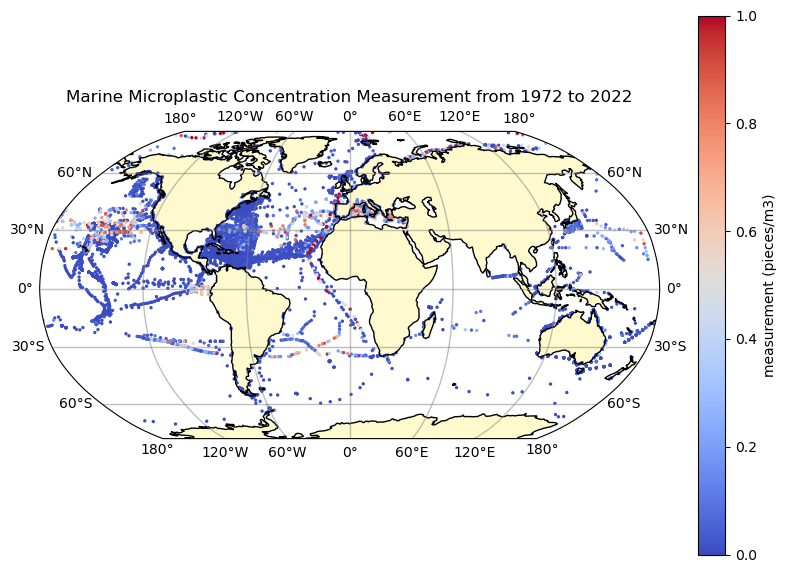

In [7]:
# create figure
fig = plt.figure(figsize=(10,7)) 
# add projection
ax = plt.axes(projection = ccrs.Robinson())
# add coastlines, land, latitude, longitude, and gridlines
ax.coastlines(resolution = '110m', color='black') 
ax.add_feature(cfeature.LAND, facecolor='lemonchiffon') 
ax.xformatter=LONGITUDE_FORMATTER
ax.yformatter=LATITUDE_FORMATTER
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
             linewidth=1, color='gray', alpha=0.5, linestyle='-') # Add gridlines
# scatter the data
scat = ax.scatter(subset['Longitude'], subset['Latitude'], c=subset['Measurement'], cmap='coolwarm',
                  transform=ccrs.PlateCarree(), marker='.', s=8)
# add a color bar
plt.colorbar(scat, label='measurement (pieces/m3)', cmap='coolwarm')
plt.title('Marine Microplastic Concentration Measurement from 1972 to 2022')

plt.show()

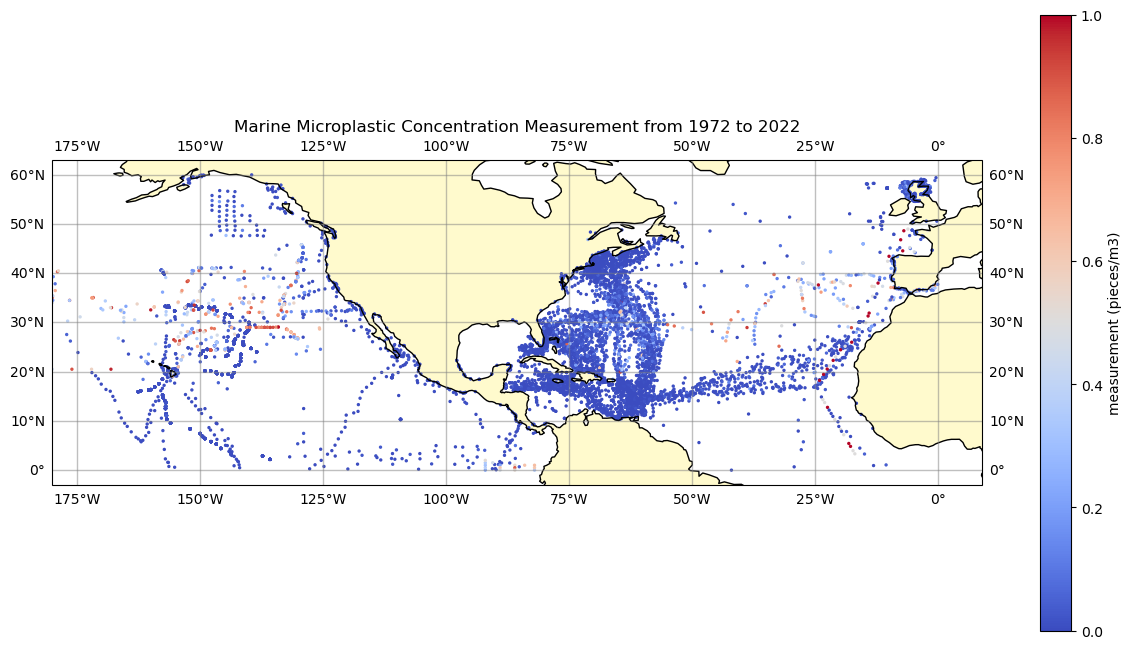

In [8]:
# select areas with the most concentrated data or seem to have an increasing trend
selected_area = subset[(subset['Latitude'] <= 60) & (subset['Latitude'] >= 0) &
                            (subset['Longitude'] <= 0)]
# create figure
fig = plt.figure(figsize=(15, 8))
# add projection
ax = plt.axes(projection=ccrs.PlateCarree())
# add coastlines, land, latitude, longitude, and gridlines
ax.coastlines(resolution = '110m', color='black') 
ax.add_feature(cfeature.LAND, facecolor='lemonchiffon') 
ax.xformatter=LONGITUDE_FORMATTER
ax.yformatter=LATITUDE_FORMATTER
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
             linewidth=1, color='gray', alpha=0.5, linestyle='-') # Add gridlines
# scatter the data
scat = ax.scatter(selected_area['Longitude'], selected_area['Latitude'], 
                  c=selected_area['Measurement'], cmap='coolwarm',
                  transform=ccrs.PlateCarree(), marker='.', s=8)
# add a color bar
plt.colorbar(scat, label='measurement (pieces/m3)', cmap='coolwarm')
plt.title('Marine Microplastic Concentration Measurement from 1972 to 2022')

plt.show()

/tmp/ipykernel_65/1812501241.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_concentrated['Year'] = area_concentrated['Date'].dt.year
/tmp/ipykernel_65/1812501241.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_increase['Year'] = area_increase['Date'].dt.year


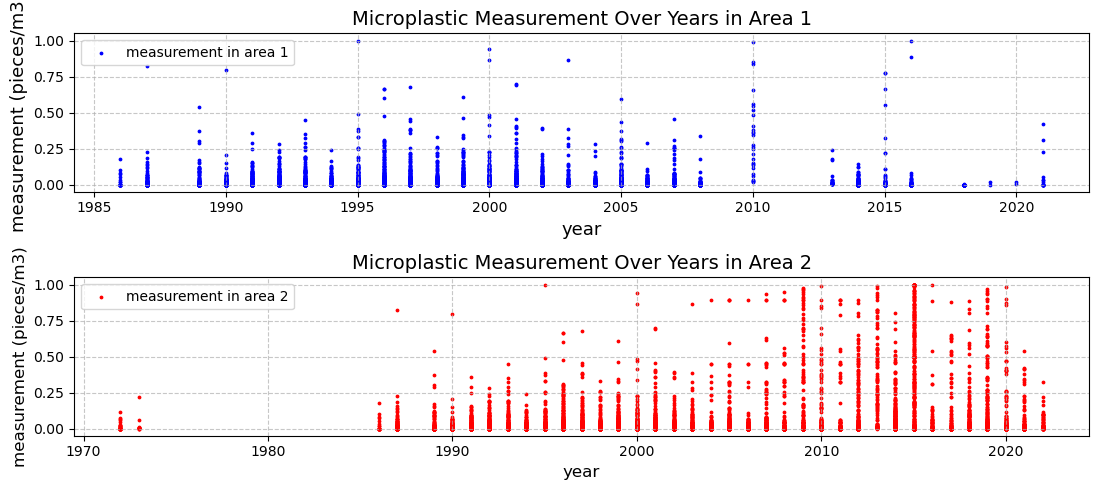

In [70]:
# prepare data for the area with the most concentrated data and the area 
# with the increase trend in data
area_concentrated = subset[(subset['Latitude'] <= 50) & (subset['Latitude'] >= 10) &
                            (subset['Longitude'] <= -50) & (subset['Longitude'] >= -100)]
area_increase = subset[(subset['Latitude'] <= 60) & (subset['Latitude'] >= 0) &
                            (subset['Longitude'] <= -125 & (subset['Longitude'] >= -170))]
area_concentrated['Year'] = area_concentrated['Date'].dt.year
area_increase['Year'] = area_increase['Date'].dt.year

# create figures
fig, axs = plt.subplots(nrows=2, figsize=(11, 5))
# plot year vs. measurement
axs[0].scatter(area_concentrated['Year'], area_concentrated['Measurement'], 
               label='measurement in area 1', color='blue', marker='o', s=3)
axs[1].scatter(area_increase['Year'], area_increase['Measurement'], label='measurement in area 2',
           color='red', marker='o', s=3)

# add labels and title for the top plot
axs[0].set_xlabel('year', fontsize=13)
axs[0].set_ylabel('measurement (pieces/m3)', fontsize=13)
axs[0].set_title('Microplastic Measurement Over Years in Area 1', fontsize=14)
# add gridlines
axs[0].grid(True, linestyle='--', alpha=0.7)
# add a legend
axs[0].legend()

# add labels and title for the bottom plot
axs[1].set_xlabel('year', fontsize=12)
axs[1].set_ylabel('measurement (pieces/m3)', fontsize=12)
axs[1].set_title('Microplastic Measurement Over Years in Area 2', fontsize=14)
# add gridlines
axs[1].grid(True, linestyle='--', alpha=0.7)
# add a legend
axs[1].legend()

# display the plot
plt.tight_layout()
plt.show()

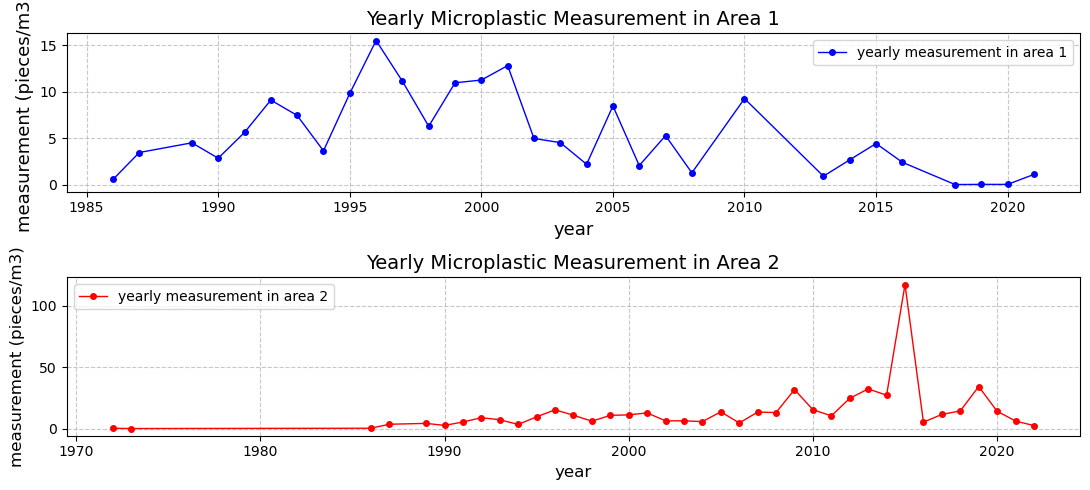

In [84]:
# sum yearly measurement for both areas
sum_by_year1 = area_concentrated.groupby('Year')['Measurement'].sum()
sum_by_year2 = area_increase.groupby('Year')['Measurement'].sum()

# create figures
fig, axs = plt.subplots(nrows=2, figsize=(11, 5))
# plot year vs. measurement
axs[0].plot(sum_by_year1.index, sum_by_year1.values, linewidth=1,
               label='yearly measurement in area 1', color='blue', marker='o', markersize=4)
axs[1].plot(sum_by_year2.index, sum_by_year2.values, label='yearly measurement in area 2', linewidth=1,
           color='red', marker='o', markersize=4)

# add labels and title for the top plot
axs[0].set_xlabel('year', fontsize=13)
axs[0].set_ylabel('measurement (pieces/m3)', fontsize=13)
axs[0].set_title('Yearly Microplastic Measurement in Area 1', fontsize=14)
# add gridlines
axs[0].grid(True, linestyle='--', alpha=0.7)
# add a legend
axs[0].legend()

# add labels and title for the bottom plot
axs[1].set_xlabel('year', fontsize=12)
axs[1].set_ylabel('measurement (pieces/m3)', fontsize=12)
axs[1].set_title('Yearly Microplastic Measurement in Area 2', fontsize=14)
# add gridlines
axs[1].grid(True, linestyle='--', alpha=0.7)
# add a legend
axs[1].legend()

# display the plot
plt.tight_layout()
plt.show()